In [23]:
# import packages
import os
import pickle
import matplotlib
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
import numpy.ma as ma
import copy
from weblogo import *
from Bio import Seq
from Bio import motifs
import logomaker
import subprocess

In [24]:
### FUNCTIONS ###
def base_key(seq):
    if seq == 'A':
        return 0
    elif seq == 'C':
        return 1
    elif seq == 'G':
        return 2
    elif seq == 'T':
        return 3

def add_pwm_weighted(pwm, seq, weight):
    df_temp = pd.DataFrame(0, columns=['A', 'C', 'G', 'T'], index=range(len(seq)), dtype=float)
    
    for i in range(len(seq)):
        df_temp.iloc[i][seq[i]] = 1*weight
        
    pwm_copy = copy.deepcopy(pwm)
    for i in range(len(pwm)):
        pwm_copy.iloc[i] = pwm_copy.iloc[i] + df_temp.iloc[i]
    
    return pwm_copy

In [25]:
# Load data
ld = os.listdir('processed_data')
fps = []
for l in sorted(ld):
    if l[-2:] == '.p':
        if l.find('_bb_count') > -1: 
            continue
        else:
            fps.append(l)

print(len(fps)) # Sanity check

23


In [40]:
# Load PAM dicts while compressing the size
PAM_dicts = {}
PAM_dicts_raw = {}
counts = {}
PAM_range = (0, 8)
for fp in fps:
    with open('processed_data/'+fp, 'rb') as f:
        PAM_dict = pickle.load(f)
        new_PAM_dict = {}
        for PAM,c in PAM_dict.items():
            compressed_PAM = PAM[PAM_range[0]:PAM_range[1]]
            if not compressed_PAM in new_PAM_dict:
                new_PAM_dict[compressed_PAM] = c
            else:
                new_PAM_dict[compressed_PAM] += c
        PAM_dicts[fp] = new_PAM_dict
    
    if fp[-8:] == 'PAM_nt.p':
        bbfile = 'processed_data/'+fp[:fp.find('_PAM_nt.p')]+'_bb_count_nt.p'
    else:
        bbfile = 'processed_data/'+fp[:fp.find('_PAM.p')]+'_bb_count.p'
    with open(bbfile, 'rb') as f:
        bb_count, passing = pickle.load(f)
        #print(fp, bb_count, passing)#, np.round(bb_count/(bb_count + passing), 4))
    counts[fp] = bb_count
        
# Get raw and p counts
for fp,PAM_dict in PAM_dicts.items():
    total_counts = sum(PAM_dict.values())
    bb_count = counts[fp]
    PAM_dict_raw = copy.deepcopy(PAM_dict)
    PAM_dicts_raw[fp] = PAM_dict_raw
    if "Input" not in fp:
        # Filter anything with only 1 occurrence (background) if not input
        PAM_dict_temp = {u: v / total_counts for u,v in PAM_dict.items() if v > 1}
        #if len(PAM_dict_temp) <= 10:
        #    PAM_dict_temp = {u: v / total_counts for u,v in PAM_dict.items()}
        PAM_dict = copy.deepcopy(PAM_dict_temp)
    else:
        PAM_dict = {u: v / total_counts for u,v in PAM_dict.items()}
    print(fp, total_counts, len(PAM_dict.keys()))
    PAM_dicts[fp] = PAM_dict

Input_library_TXTL_PAM.p 5093443 59595
P1_A10_S10_R1_001_PAM.p 2426 350
P1_A11_S11_R1_001_PAM.p 31 1
P1_A1_S1_R1_001_PAM.p 112 6
P1_A2_S2_R1_001_PAM.p 14990 2227
P1_A3_S3_R1_001_PAM.p 9716 1190
P1_A4_S4_R1_001_PAM.p 31528 3320
P1_A5_S5_R1_001_PAM.p 1326 116
P1_A6_S6_R1_001_PAM.p 5827 1013
P1_A7_S7_R1_001_PAM.p 6692 1023
P1_A8_S8_R1_001_PAM.p 4995 743
P1_A9_S9_R1_001_PAM.p 10542 2010
P1_B10_S21_R1_001_PAM.p 2295 322
P1_B11_S22_R1_001_PAM.p 139 12
P1_B1_S12_R1_001_PAM.p 426 29
P1_B2_S13_R1_001_PAM.p 494 42
P1_B3_S14_R1_001_PAM.p 2412 423
P1_B4_S15_R1_001_PAM.p 2499 490
P1_B5_S16_R1_001_PAM.p 17 0
P1_B6_S17_R1_001_PAM.p 30 0
P1_B7_S18_R1_001_PAM.p 4115 625
P1_B8_S19_R1_001_PAM.p 6738 900
P1_B9_S20_R1_001_PAM.p 1916 213


In [41]:
# Get all PAM keys
PAM_keys = [''.join(t) for t in itertools.product(*[['A', 'T', 'G', 'C'] for i in range(PAM_range[1]-PAM_range[0])])]



In [42]:
for i in range(len(PAM_dicts)):
    print(str(i)+'\t'+list(PAM_dicts.keys())[i])

0	Input_library_TXTL_PAM.p
1	P1_A10_S10_R1_001_PAM.p
2	P1_A11_S11_R1_001_PAM.p
3	P1_A1_S1_R1_001_PAM.p
4	P1_A2_S2_R1_001_PAM.p
5	P1_A3_S3_R1_001_PAM.p
6	P1_A4_S4_R1_001_PAM.p
7	P1_A5_S5_R1_001_PAM.p
8	P1_A6_S6_R1_001_PAM.p
9	P1_A7_S7_R1_001_PAM.p
10	P1_A8_S8_R1_001_PAM.p
11	P1_A9_S9_R1_001_PAM.p
12	P1_B10_S21_R1_001_PAM.p
13	P1_B11_S22_R1_001_PAM.p
14	P1_B1_S12_R1_001_PAM.p
15	P1_B2_S13_R1_001_PAM.p
16	P1_B3_S14_R1_001_PAM.p
17	P1_B4_S15_R1_001_PAM.p
18	P1_B5_S16_R1_001_PAM.p
19	P1_B6_S17_R1_001_PAM.p
20	P1_B7_S18_R1_001_PAM.p
21	P1_B8_S19_R1_001_PAM.p
22	P1_B9_S20_R1_001_PAM.p


Input_library_TXTL_PAM.p
P1_A10_S10_R1_001_PAM.p
P1_A11_S11_R1_001_PAM.p
P1_A1_S1_R1_001_PAM.p
P1_A2_S2_R1_001_PAM.p
P1_A3_S3_R1_001_PAM.p
P1_A4_S4_R1_001_PAM.p
P1_A5_S5_R1_001_PAM.p
P1_A6_S6_R1_001_PAM.p
P1_A7_S7_R1_001_PAM.p
P1_A8_S8_R1_001_PAM.p
P1_A9_S9_R1_001_PAM.p
P1_B10_S21_R1_001_PAM.p
P1_B11_S22_R1_001_PAM.p
P1_B1_S12_R1_001_PAM.p
P1_B2_S13_R1_001_PAM.p
P1_B3_S14_R1_001_PAM.p
P1_B4_S15_R1_001_PAM.p
P1_B5_S16_R1_001_PAM.p
P1_B6_S17_R1_001_PAM.p
P1_B7_S18_R1_001_PAM.p
P1_B8_S19_R1_001_PAM.p
P1_B9_S20_R1_001_PAM.p


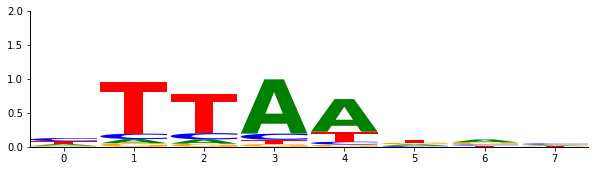

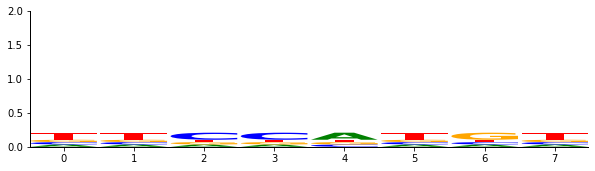

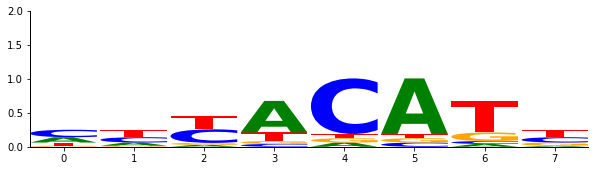

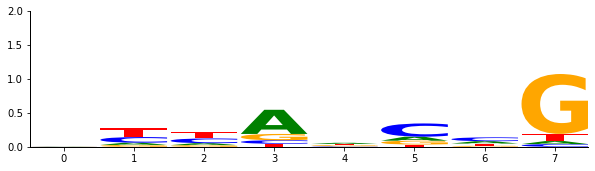

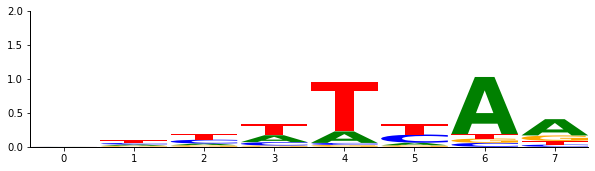

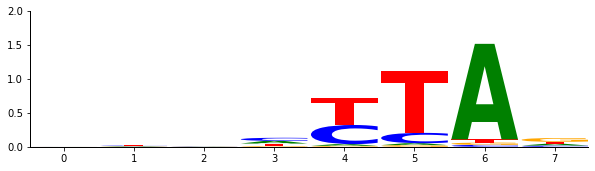

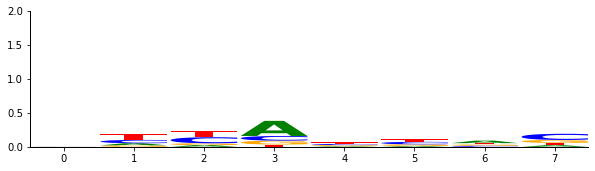

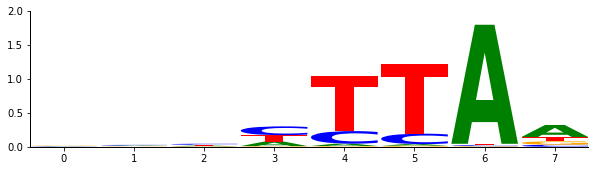

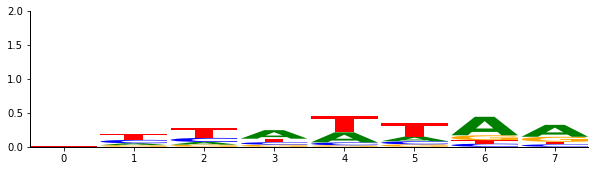

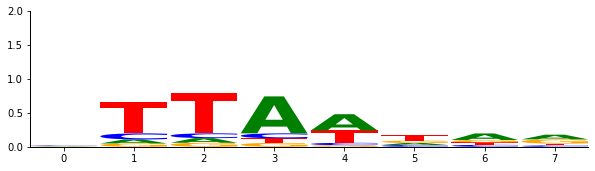

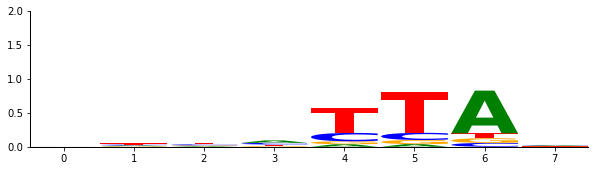

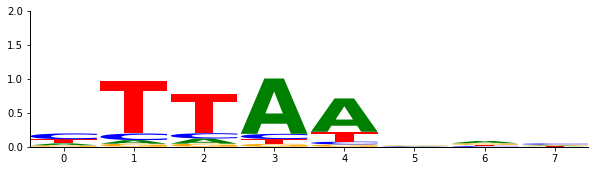

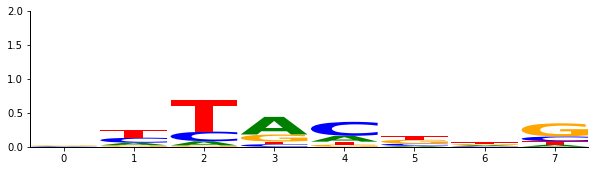

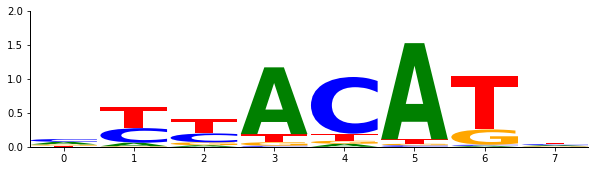

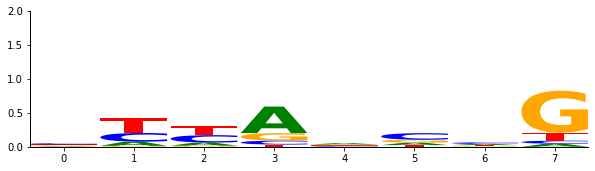

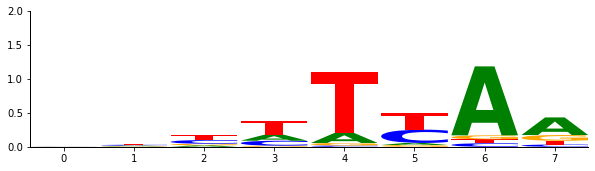

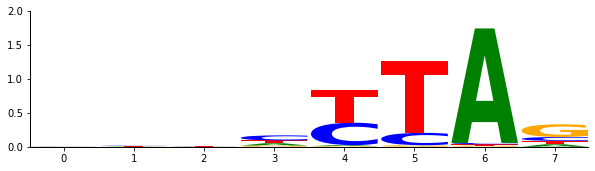

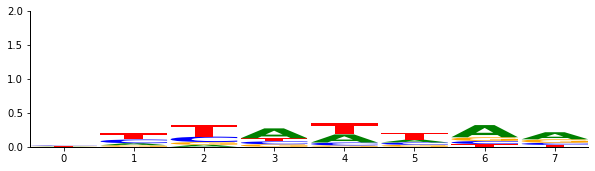

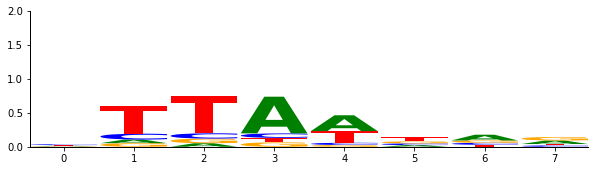

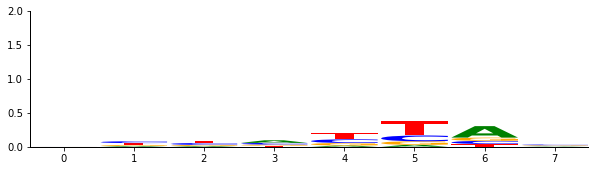

In [43]:
# krona_ind = [26, 27, 52, 53, 84, 85]

trash_list = []

for i in range(len(PAM_dicts)):
    # Sample name
    # n = krona_ind[i]
    name_temp = list(PAM_dicts.keys())[i]
    print(name_temp)
    
    if 'Input' not in name_temp:
        # Get PAM frequencies
        x_fps = fps[0:1] #input library
        y_fps = fps[fps.index(name_temp):fps.index(name_temp)+1]
        X = np.average([[PAM_dicts_raw[x_fp].get(PAM, 1e-9) for PAM in PAM_keys] for x_fp in x_fps], axis=0)
        Y = np.average([[PAM_dicts_raw[y_fp].get(PAM, 1e-9) for PAM in PAM_keys] for y_fp in y_fps], axis=0)

        #print(PAM_dicts)
        # Filter for enriched PAMs
        bm = Y > 1


        PAMs_temp = {}
        for b, PAM, mag in zip(bm, PAM_keys, Y):
            if b:
                if mag < 10000:
                    s = PAM
                    m = mag
                    PAMs_temp[s] = m
        #print(PAMs_temp)

        if len(PAMs_temp.keys()) > 0:
            #Save PAMs
            PAMs_temp_sorted = {k: v for k, v in sorted(PAMs_temp.items(), key=lambda item: item[1])}
            df_temp = pd.DataFrame.from_dict(PAMs_temp_sorted, orient='index', columns=['fold enrichment'])
            df_temp.to_csv(name_temp.split('_')[0]+"_"+name_temp.split('_')[1]+"_"+name_temp.split('_')[2]+"_new_topPAMs.csv")


            # FOR WEBLOGOS ##

            #Initialize PWM
            pwm = pd.DataFrame(0, columns=['A', 'C', 'G', 'T'], index = range(len(list(PAMs_temp.keys())[0])), dtype=float)

            with open(name_temp.split('_')[0]+"_"+name_temp.split('_')[1]+"_"+name_temp.split('_')[2]+'_PAM.fasta', 'w') as out_fasta:
                for j in range(len(list(PAMs_temp.keys()))):
                    PAMtemp = list(PAMs_temp.keys())[j]
                    if PAMtemp not in trash_list:
                        #Build PWM
                        pwm = add_pwm_weighted(pwm, PAMtemp, PAMs_temp[PAMtemp])
                        for i in range(int(PAMs_temp[PAMtemp])):
                            out_fasta.write('>'+str(j)+'\n'+PAMtemp+'\n')
            #print(pwm)
           # Transform to information score
            pwm_inf = logomaker.transform_matrix(pwm, from_type='counts', to_type='information')

            # Transform to dictionary
            pwm_dict = {'A': list(pwm['A']), 'C': list(pwm['C']), 'G': list(pwm['G']), 'T': list(pwm['T'])}


            # Define color scheme
            color_scheme = {'A' :'#62bb46', 'C': '#225fa9', 'G': '#faa53f', 'T': '#EA2442'}


           # Make Weblogos
            #motifs.Motif(counts=pwm_dict).weblogo(fname=name_temp.split('_')[0]+"_"+name_temp.split('_')[1]+"_"+name_temp.split('_')[2]+'_PAM.pdf', format='pdf', color_scheme='color_custom', symbols0='A', color0=color_scheme['A'], symbols1='C', color1=color_scheme['C'], symbols2='G', color2=color_scheme['G'], symbols3='T', color3=color_scheme['T'])

            tam_logo = logomaker.Logo(pwm_inf)
            tam_logo.style_spines(visible=False)
            tam_logo.style_spines(spines=['left', 'bottom'], visible=True)
            tam_logo.ax.set_ylim([0, 2])

            plt.savefig(name_temp.split('_')[0]+"_"+name_temp.split('_')[1]+"_"+name_temp.split('_')[2]+'_PAM.pdf')

            ## FOR KRONA PLOT ##
    #         fname = name_temp.split('.')[0]+'_krona.txt'
    #         with open(fname, 'w') as kfile:
    #             for j in range(len(list(PAMs_temp.keys()))):
    #                 PAMtemp = list(PAMs_temp.keys())[j]
    #                 kfile.write(str(PAMs_temp[PAMtemp])+'\t'+'\t'.join(list(list(PAMs_temp.keys())[j]))+'\t\n')

    #         out_name = name_temp.split('.')[0]+'_krona.html'
    #         cmd = 'ktImportText -o %s %s' % (out_name, fname)
    #         process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    #         output, error = process.communicate()
    

In [31]:
##### TESTING STUFF BELOW ####

In [26]:
color_scheme['T']

'#EA2442'